In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
survived = df.Survived
survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
df = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [5]:
df.Sex = pd.Categorical(df.Sex, ['male', 'female'], ordered=True)
df.Embarked = pd.Categorical(df.Embarked, ['C', 'Q', 'S'], ordered=True)
df.Sex
# print(df.Embarked.head(100))
# df[df['Embarked'] == np.NaN

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: category
Categories (2, object): [male < female]

In [6]:
df.Embarked = df.Embarked.cat.codes
df.Embarked

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int8

In [7]:
df.Sex = df.Sex.cat.codes
df.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int8

In [8]:
df['Age'] = df['Age'].replace(0, np.NaN)
mean_age = int(df['Age'].mean(skipna=True))
df['Age'] = df['Age'].replace(np.NaN, mean_age)
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
mean_embarked = df['Embarked'].mean(skipna=True)
df['Embarked'] = df['Embarked'].replace(np.NaN, mean_embarked)

In [10]:
x = df.iloc[:, 0:]
y = survived
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,2
887,1,1,19.0,0,0,30.0000,2
888,3,1,29.0,1,2,23.4500,2
889,1,0,26.0,0,0,30.0000,0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
264,3,1,29.0,0,0,7.7500,1
213,2,0,30.0,0,0,13.0000,2
506,2,1,33.0,0,2,26.0000,2
195,1,1,58.0,0,0,146.5208,0
511,3,0,29.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
198,3,1,29.0,0,0,7.7500,1
212,3,0,22.0,0,0,7.2500,2
152,3,0,55.5,0,0,8.0500,2
811,3,0,39.0,0,0,24.1500,2


In [12]:
y_train

264    0
213    0
506    1
195    1
511    0
      ..
198    1
212    0
152    0
811    0
447    1
Name: Survived, Length: 712, dtype: int64

In [13]:
import math

math.sqrt(len(y_test))

13.379088160259652

In [14]:
knn_scores = []
for k in range (1, 20):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train, y_train)
    knn_scores.append(round(knn_clf.score(x_test, y_test), 2))
    
knn_scores

[0.7,
 0.71,
 0.73,
 0.7,
 0.71,
 0.69,
 0.72,
 0.7,
 0.68,
 0.69,
 0.7,
 0.7,
 0.71,
 0.7,
 0.7,
 0.7,
 0.69,
 0.69,
 0.69]

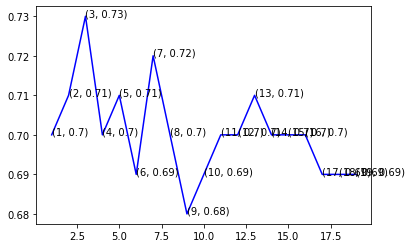

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([k for k in range(1, 20)], knn_scores, color='blue')

for i in range(1, 20):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))

In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
knn_clf.score(x_test, y_test)
# knn_scores.append(round(knn_clf.score(x_test, y_test), 2))

0.7262569832402235

In [17]:
from sklearn.ensemble import RandomForestClassifier

knn_scores = []
for k in range (1, 20):
    rnd_frst = RandomForestClassifier(n_estimators=k)
    rnd_frst.fit(x_train, y_train)
    knn_scores.append(round(rnd_frst.score(x_test, y_test), 2))
    
knn_scores

[0.74,
 0.8,
 0.79,
 0.78,
 0.82,
 0.8,
 0.79,
 0.79,
 0.8,
 0.8,
 0.8,
 0.82,
 0.77,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.78]

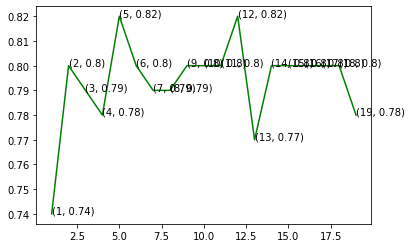

In [18]:
plt.plot([k for k in range(1, 20)], knn_scores, color='green')

for i in range(1, 20):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))

In [19]:
rnd_frst = RandomForestClassifier(n_estimators=12)
rnd_frst.fit(x_train, y_train)
rnd_frst.score(x_test, y_test)

0.7988826815642458

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtc = DecisionTreeClassifier()

In [22]:
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.776536312849162